In [71]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy as sp

In [72]:
def plotagraficos (opiniao,modelo):
  f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
  ax1.set_title(label=modelo)
  ax1.scatter(DadosTreino['x'],DadosTreino['y'],c=opiniao,cmap="rainbow")
  ax2.set_title("Original")
  ax2.scatter(DadosTreino['x'],DadosTreino['y'],c=dados['label'],cmap="rainbow")

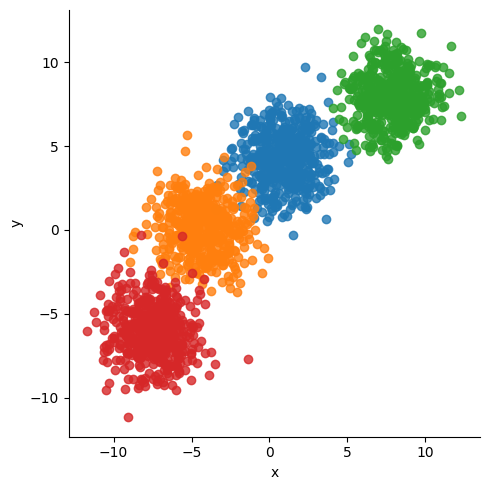

             x         y  label
0     8.550574  7.811962      2
1     0.604058  4.815470      0
2     5.680705  9.342971      2
3    -0.940972  5.686262      0
4     8.687082  6.941548      2
...        ...       ...    ...
1995 -2.591342 -1.729386      1
1996  8.197490  7.644839      2
1997  0.438963  4.228444      0
1998  1.741641  5.177281      0
1999 -9.637148 -5.152756      3

[2000 rows x 3 columns]
0       8.550574
1       0.604058
2       5.680705
3      -0.940972
4       8.687082
          ...   
1995   -2.591342
1996    8.197490
1997    0.438963
1998    1.741641
1999   -9.637148
Name: x, Length: 2000, dtype: float64


In [73]:
dados = pd.read_csv("Base2.csv")
df_dados = pd.DataFrame(dados)
sns.lmplot( x="x", y="y", data=df_dados, fit_reg=False, hue='label', legend=False)
plt.show()
print(df_dados)
print(df_dados  ['x'])

/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


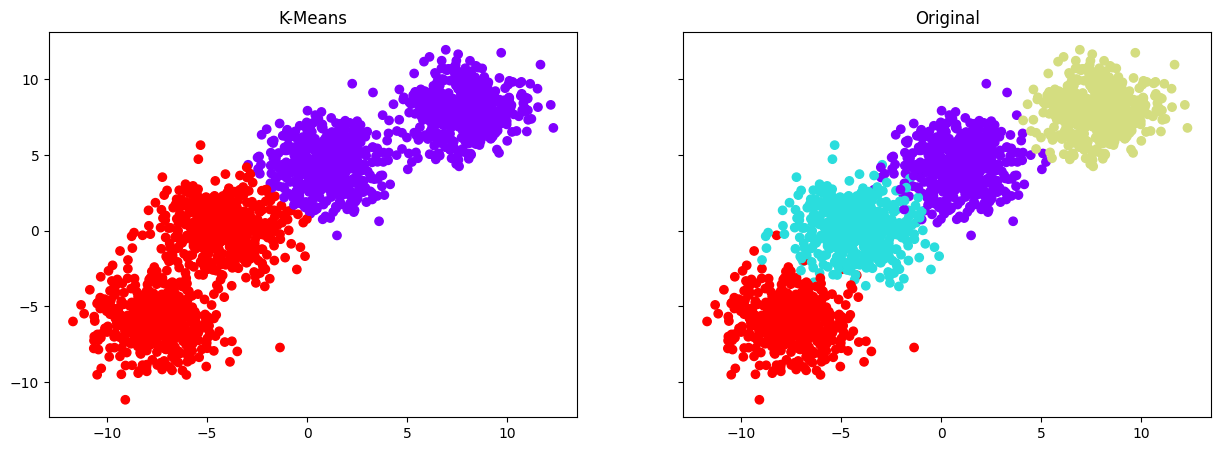

In [75]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=2)
DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
kmeans.fit(DadosTreino)
X = kmeans.labels_
plotagraficos(X,'K-Means')

Avaliando os clusters

In [76]:
from sklearn.metrics.cluster import contingency_matrix
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],kmeans.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], kmeans.labels_))


Soma dos quadrados das distâncias até o centróide mais próximo:  35985.8302422298

Coesão:  94.8496576723261

Separação:  0.5838393288448248

Coeficiente de Silhueta:  0.5989206835629887

Rand Score K-means:  0.7405507753876939

Homogeneidade :  0.4668390688765666

Completude :  0.9337326956966284

Matriz de contingência kmeans
 [[486  14]
 [  5 495]
 [500   0]
 [  0 500]]
Entropia: 1.0663218622468666
